# Support Vector Machines

## 1. Linearly separable case

### Example 1. "Toy" example with a straightforward solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from numpy import linalg
rcParams['figure.figsize'] = 5, 4

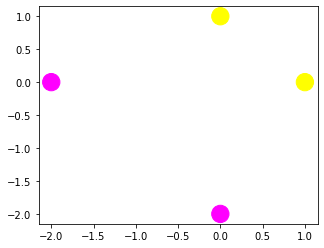

In [2]:
# Generate and visualize the toy data
X=np.array([[1,0],[0,1],[-2,0],[0,-2]],dtype='float32')
Y=np.array([1]*2+[-1]*2)

plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=Y, s=300, cmap='spring')
plt.show()

Question: How to find a line (or more generally, a hyperplane) to separate the data? We could have multiple choices, but which one is the best?


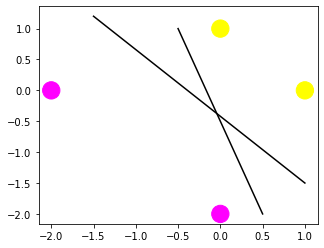

In [3]:
plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=Y, s=300, cmap='spring')
plt.plot([-1.5,1], [1.2,-1.5], 'k-')
plt.plot([0.5,-.5],[-2,1], 'k-')
plt.show()

We need to find the hyperplane: $w_1 x_1+w_2 x_2+b=0$ 

such that:
$$\begin{cases} \underset{w=(w_1,w_2),b,\Vert w \Vert=1}{\text{max}} M \\
y_i(x_{i}^{T}w + b)\ge M, \: \forall i
\end{cases}$$

With a change of variables, we can get these equivalent conditions for calculation convenience:
$$\begin{cases} \underset{w,b}{\text{min}} \Vert w \Vert^2 \\
y_i(x_{i}^{T}w + b)\ge 1, \: \forall i
\end{cases}$$

For this simple case, we could solve those conditions by hand, with respect to $X=\left[(1,0),(0,1),(-2,0),(0,-2)\right]$ and $Y=(1,1,-1,-1)$:

$$\begin{cases} \underset{w,b}{\text{min}} (w_1^2+w_2^2)\\
w_1+b\ge1\hspace{3ex}(E1.1)\\
w_2+b\ge1\hspace{3ex}(E1.2)\\
(-1)*(-2w_1+b)\ge1\hspace{3ex}(E1.3)\\
(-1)*(-2w_2+b)\ge1\hspace{3ex}(E1.4)
\end{cases}$$

(E1.1)+(E1.3)$\Rightarrow$
$3 w_1\ge2$

(E1.2)+(E1.4)$\Rightarrow$
$3 w_2\ge2$

(E1.1),(E1.3)$\Rightarrow$
$2 w_1-1\ge b \ge 1-w_1$

(E1.2),(E1.3)$\Rightarrow$
$2 w_2-1\ge b \ge 1-w_2$

Then $(w_1^2+w_2^2)$ reaches the minimum under the above conditions for the minimal possible $w_1=w_2=2/3$, and $b=1/3$. Those values satisfy (E1.1)-(E1.4) and provide the definition for the separating line as $2 x_1+2 x_2+1=0$. 

Then the corresponding maximal value of the margin is $M=\frac{1}{||w||}=\frac{1}{\sqrt{8/9}}=\frac{3\sqrt{2}}{4}$.

Let's see the plot:

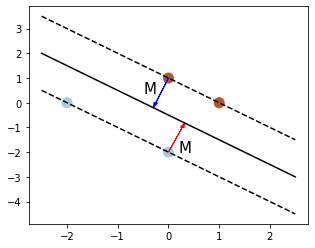

In [4]:
# Now let's plot the graph...

x1 = np.linspace(-2.5, 2.5)
x2 = -x1-0.5 # this is the separating hyperplane that we found
M=3*np.sqrt(2)/4 # this is the margin M that we found

# plot the parallels to the separating hyperplane that pass through the points
x2_down = -x1-0.5+1.5
x2_up = -x1-0.5-1.5

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.axis('tight')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=100)
plt.arrow(0, 1, -0.25, -1, fc="b", ec="b", head_width=0.07, head_length=0.2)
plt.annotate("M", xy=(-0.5, 0.4), fontsize=15)
plt.arrow(0, -2, 0.27, 1, fc="r", ec="r", head_width=0.07, head_length=0.2);
plt.annotate("M", xy=(0.2, -2), fontsize=15)
plt.show()

So in this case all of the points touch the margin and therefore are support vectors.

### SVM Package.

http://scikit-learn.org/stable/modules/svm.html#


http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

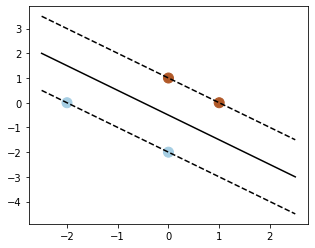

In [5]:
from sklearn import svm

# Fit the model.  Using a linear SVM; very large penalty for misclassification.
# Since the data is linearly separable, it won't misclassify any points.
clf = svm.SVC(kernel='linear',C=10**10)  
clf.fit(X, Y)

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane (slope = a) that go through the support vectors.

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=100)

plt.axis('tight')
plt.show()

## 2. Soft Margin

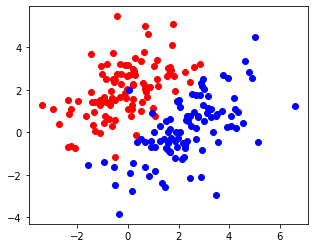

In [6]:
# Generate data that are _not_ fully separable this time.
np.random.seed(999)
mean1 = np.array([0, 2])
mean2 = np.array([2, 0])
cov = np.array([[1.8, 1.0], [1.0, 1.8]])
X1 = np.random.multivariate_normal(mean1, cov, 100)
y1 = np.ones(len(X1))
X2 = np.random.multivariate_normal(mean2, cov, 100)
y2 = np.ones(len(X2)) * -1

plt.gca()
plt.scatter(X1[:,0],X1[:,1], c='r') 
plt.scatter(X2[:,0],X2[:,1], c='b')
X=np.concatenate((X1,X2),axis=0)
Y=np.concatenate((y1,y2))
plt.show()

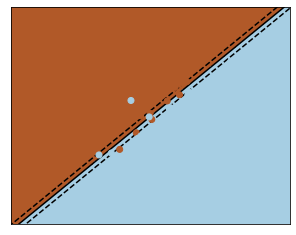

In sample, we successfully predict 96.5 percent of the data


In [7]:
# Obviously, we cannot perfectly separate these two clusters with a line.
# let's use a soft margin classifier model over the entire data with C=1.

clf = svm.SVC(kernel='linear', C=1) # You can try other C; for this example the model is not too sensitive to choice of C.
clf.fit(X, Y)

# Plot the line, the points, and the nearest vectors to the plane.

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y


###########################################################################################
plt.axis('tight')
x_min = -6
x_max = 8
y_min = -6
y_max = 8

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the decision function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading = 'auto') # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Let's calculate the IS errors: (Just use clf.predict and compare the predicted labels with true labels)
print("In sample, we successfully predict {} percent of the data".format(100.*(clf.predict(X)==np.asarray(Y)).sum()/len(Y)))


In [8]:
# Let's see the out-of-sample performance.
# As usual, let's divide our data into training and test data.

from sklearn.model_selection import train_test_split

OS = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=i)

    clf = svm.SVC(kernel='linear', C=1) 
    clf.fit(X_train, Y_train)

    correct = 1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
    OS.append(correct)

print(OS)
print("Out of sample, we successfully predict {} percent of the data".format((np.mean(OS))*100))

[0.9696969696969697, 0.9696969696969697, 0.9393939393939394, 0.9848484848484849, 1.0, 0.9393939393939394, 0.9545454545454546, 0.9545454545454546, 0.9696969696969697, 0.9393939393939394]
Out of sample, we successfully predict 96.21212121212123 percent of the data


## Practice #1:  

Let C=np.exp(-10), and report the average out-of-sample accuracy over 10 random train/test splits. 

In [28]:
# Let's see the out-of-sample performance.
# As usual, let's divide our data into training and test data.

from sklearn.model_selection import train_test_split

OS = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=i)

    clf = svm.SVC(kernel='linear', C=np.exp(-10)) 
    clf.fit(X_train, Y_train)

    correct = 1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
    OS.append(correct)

print(OS)
print("Out of sample, we successfully predict {} percent of the data".format((np.mean(OS))*100))

[0.5625, 0.5625, 0.71875, 0.53125, 0.75, 0.6875, 0.5625, 0.65625, 0.59375, 0.6875]
Out of sample, we successfully predict 63.125 percent of the data


## Practice #2: Optimal C tuning.

Try C in [np.exp(i) for i in np.linspace(-5,5,100)] to find the optimal C using the training set.
Use the package GridSearchCV from sklearn.model_selection.  Evaluate your model using the testing set.

Average the out-of-sample accuracy over 10 different random train/test splits.

In [10]:
# Reminder:
print(list(range(-5,5))) # integers; does not include endpoints
print(np.linspace(-5,5,100)) # reals; does include endpoints by default

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel':['linear'],
             'C':[np.exp(i) for i in np.linspace(-5,5,100)]}

OS = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=i)
    clf = svm.SVC()
    gr = GridSearchCV(clf, param_grid=param_grid)
    rs = gr.fit(X_train, Y_train)
    
    print(rs.best_estimator_)
    correct = 1.0*(rs.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
    OS.append(correct)
print(OS)

SVC(C=26.65104289397306, kernel='linear')
SVC(C=19.683839709790607, kernel='linear')
SVC(C=17.792693202628776, kernel='linear')
SVC(C=21.775992049561445, kernel='linear')
SVC(C=134.15420192797174, kernel='linear')
SVC(C=99.08316975251431, kernel='linear')
SVC(C=7.930428509605459, kernel='linear')
SVC(C=54.04942954924472, kernel='linear')
SVC(C=26.65104289397306, kernel='linear')
SVC(C=7.930428509605459, kernel='linear')
[0.96875, 0.90625, 0.9375, 0.90625, 0.875, 0.96875, 0.9375, 1.0, 0.9375, 0.96875]


### For one random train/test split, let's plot the OS prediction accuracy as a function of C.

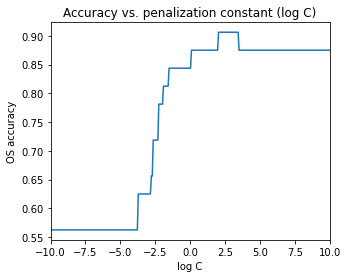

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=70)

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.
C = [np.exp(i) for i in np.linspace(-10,10,300)]
OS = []
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train, Y_train)
    correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
    OS.append(correct)

plt.gca()
plt.plot(np.linspace(-10,10,300),OS)
plt.xlabel("log C")
plt.ylabel("OS accuracy")
plt.title("Accuracy vs. penalization constant (log C)")
plt.xlim(-10,10)
plt.show()

## 3. Non-linearly separable case: Gaussian and polynomial kernels

## Example 3: Using Kernels (Gaussian)

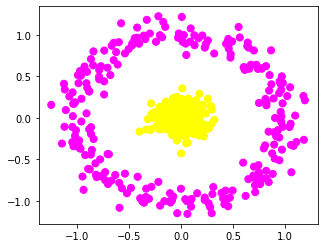

In [32]:
# For this data we could use SVM with a Gaussian kernel to separate
from sklearn.datasets import make_circles
X, Y = make_circles(500, factor=.1, noise=.1,random_state=999)

plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
plt.show()

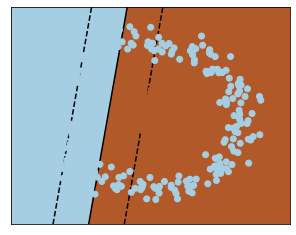

In sample, we successfully predict 68.0 percent of the data


In [33]:
# Let's have a quick look at Linear SVM
clf = svm.SVC(kernel='linear',C=1) 
clf.fit(X, Y)

# Plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -1.5
x_max = 1.5
y_min = -1.5
y_max = 1.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the decision function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading = 'auto') # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Let's calculate the IS mistakes: (Just use clf.predic to compare the predicted labels with current labels)
print("In sample, we successfully predict {} percent of the data".format(1.0*(clf.predict(X)==Y).sum()/len(Y)*100))

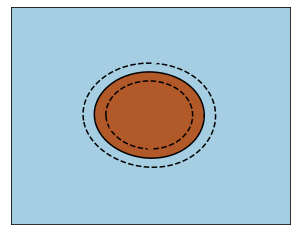

In sample, we successfully predict 100.0 percent of the data


In [34]:
# Gaussian Kernel SVM, aka "Radial Basis Function" or "RBF".
# Gamma is an extra bandwidth parameter
clf = svm.SVC(kernel='rbf',gamma=1) 

clf.fit(X, Y)

# Plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y


#####################################################################################
plt.axis('tight')
x_min = -1.5
x_max = 1.5
y_min = -1.5
y_max = 1.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading = 'auto') # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

print("In sample, we successfully predict {} percent of the data".format(100.0*(clf.predict(X)==Y).sum()/len(Y)))

## Example 4. Polynomial kernel

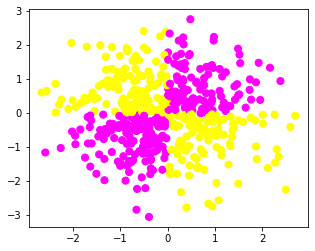

In [35]:
# Generate data
np.random.seed(0)
X = np.random.randn(500, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)*1
plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
plt.show()

In [36]:
# Obviously, a linear model won't work.
# Let's try a soft margin linear classifier model on the entire data with C=1. 
# You can try other C as well, but the visual intuition hints that it won't help much.

clf = svm.SVC(kernel='linear',C=1) 
clf.fit(X, Y)

print("In sample, we successfully predict {} percent of the data".format((clf.predict(X)==Y).sum()*100/len(Y)))

In sample, we successfully predict 52.0 percent of the data


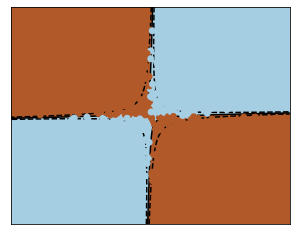

In sample, we successfully predict 95.8 percent of the data


In [37]:
# Now let's use polynomial kernel with degree 2 
clf = svm.SVC(kernel='poly',degree=2) 
clf.fit(X, Y)

# Plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)


################################################################################
plt.axis('tight')
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading = 'auto')
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

print("In sample, we successfully predict {} percent of the data".format((Y==clf.predict(X)).sum()*100/len(Y)))

In [38]:
# Let's see how we do out of sample, dividing the dataset into training and test, and averaging over 10 random splits.
from sklearn.model_selection import train_test_split
OS = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=i)

    clf = svm.SVC(kernel='poly',degree=2) 
    clf.fit(X_train, Y_train)

    correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)
    OS.append(correct)
    
print("Out of sample, we successfully predict {} percent of the data".format((np.mean(correct))*100))


Out of sample, we successfully predict 93.33333333333333 percent of the data


## Classification of individual/commercial houses

In [39]:
data = pd.read_csv("NYC_individual_commercial.csv")
print(data.head())
X=data.iloc[:,:4]
Y=data.iloc[:,4]

   area  land  year      price  bldtype
0  2607  1200  2010   825000.0        0
1  1950  1783  1899  1685000.0        0
2  2520  1875  1899  1100000.0        0
3  3750  3125  1931  1200000.0        1
4  7812  5021  1908  1900000.0        1


In [40]:
# Data standardization highly recommended prior to using SVM.  
# You should scale all real-valued attributes and replace any discrete-valued attributes with dummy variables.
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X=X_scaled
print(pd.DataFrame(X).head())

          0         1         2         3
0 -0.284829 -0.452581  2.232000 -1.171637
1 -0.316094 -0.361470 -0.461891 -0.664654
2 -0.288970 -0.347092 -0.461891 -1.009520
3 -0.230438 -0.151743  0.314726 -0.950568
4 -0.037140  0.144564 -0.243467 -0.537908


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=90)

### Linear model with soft margin.

In [42]:
from sklearn import svm
# Let's first try a linear model with parameter value C=1.
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, linear model successfully predicts {} percent of the data".format((correct)*100))

Out of sample, linear model successfully predicts 78.125 percent of the data


              0         1
0      0.000335  0.428571
1      0.000465  0.428571
2      0.000645  0.428571
3      0.000893  0.428571
4      0.001238  0.428571
5      0.001717  0.428571
6      0.002380  0.428571
7      0.003299  0.428571
8      0.004572  0.428571
9      0.006338  0.428571
10     0.008785  0.428571
11     0.012178  0.428571
12     0.016880  0.428571
13     0.023398  0.428571
14     0.032433  0.476190
15     0.044957  0.523810
16     0.062318  0.523810
17     0.086382  0.619048
18     0.119738  0.619048
19     0.165975  0.666667
20     0.230066  0.619048
21     0.318907  0.761905
22     0.442053  0.761905
23     0.612751  0.761905
24     0.849366  0.809524
25     1.177349  0.809524
26     1.631983  0.809524
27     2.262175  0.857143
28     3.135715  0.857143
29     4.346573  0.857143
30     6.025005  0.857143
31     8.351565  0.857143
32    11.576528  0.904762
33    16.046812  0.904762
34    22.243299  0.952381
35    30.832565  0.904762
36    42.738581  0.904762
37    59.242

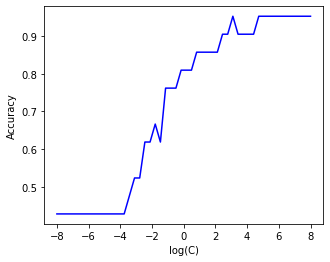

In [43]:
# Let's do cross validation for choosing C since we see that the accuracy is not so good.
# We could have used GridSearchCV, but let's try optimizing the parameter manually

# Divide the training set into training set and validation set.
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=2999)

C = [np.exp(i) for i in np.linspace(-8,8,50)] 
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation.append(correct)
    
temp=pd.DataFrame([C,OS_validation]).T # put results together.
print(temp)

C=[np.log(y) for y in C] # for a better graph
plt.gca()
plt.plot(C,OS_validation,'b',)
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

### We choose C based on the validation results above, and see the out-of-sample accuracy on the test set.

In [44]:
clf = svm.SVC(kernel='linear',C=500)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data using a linear kernel".format((correct)*100))

Out of sample, we successfully predict 93.75 percent of the data using a linear kernel


## Practice #3: Polynomial kernel

Use the default hyper-parameters (C=1, Poly=3) to train the model using training data. Please report the OS accuracy on your testing data.

In [47]:
clf = svm.SVC(kernel='poly',C=1, degree = 3)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data using a linear kernel".format((correct)*100))

Out of sample, we successfully predict 71.875 percent of the data using a linear kernel


## Practice #4: Parameter tuning

Please use the training set to pick the optimal model (for an SVM with polynomial kernel) from the following combinations of options, using GridSearchCV:

degree in range(1,7)

C in 10**np.linspace(-5,10,20)

coef0 in 10**np.linspace(-3,3,20)

max_iter=100

What is the out-of-sample accuracy?

In [49]:
param_grid = {'kernel':['poly'],
              'degree':range(1,7),
              'C':[10**i for i in np.linspace(-5,10,20)],
              'coef0':[10**i for i in np.linspace(-3,3,20)],
             'max_iter':[100]}

rr = svm.SVC()
gr = GridSearchCV(rr, param_grid=param_grid)
rs = gr.fit(X_train, Y_train)

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/

/Users/lizjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [50]:
print(rs.best_params_)
print(1.0*(rs.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test))

{'C': 0.000379269019073225, 'coef0': 233.57214690901213, 'degree': 3, 'kernel': 'poly', 'max_iter': 100}
0.9375
